In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the file
leadfile=pd.read_csv("Leads.csv")
leadfile.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leadfile.shape

(9240, 37)

In [4]:
leadfile.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
leadfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Checking for duplicates
sum(leadfile.duplicated(subset = 'Prospect ID')) == 0

True

In [7]:
sum(leadfile.duplicated(subset = 'Lead Number')) == 0

True

In [8]:
#Replacing select with nulls as theyre the same
leadfile=leadfile.replace('Select',np.nan)

In [9]:
#checking null percentages
leadfile.isnull().sum()/len(leadfile)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
#deleting those with more than 30 percent null values
k=leadfile.columns

for x in k:
    if((100*leadfile[x].isnull().sum()/len(leadfile.index))>=30):
        leadfile.drop(x, axis = 1, inplace = True)

In [11]:
#checking to see if any left
leadfile.isnull().sum()/len(leadfile)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [12]:
#Line 12-26 I have replaced missing values with modes
leadfile['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [13]:
leadfile['Lead Source']=leadfile['Lead Source'].replace(np.nan,'Google')

In [14]:
leadfile['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [15]:
leadfile['TotalVisits']=leadfile['TotalVisits'].replace(np.nan,'0.0')

In [16]:
leadfile['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [17]:
leadfile['Page Views Per Visit']=leadfile['Page Views Per Visit'].replace(np.nan,'0.00')

In [18]:
leadfile['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [19]:
leadfile['Last Activity']=leadfile['Last Activity'].replace(np.nan,'Email Opened')

In [20]:
leadfile['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [21]:
leadfile['Country']=leadfile['Country'].replace(np.nan,'India')

In [22]:
leadfile['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
leadfile['What is your current occupation']=leadfile['What is your current occupation'].replace(np.nan,'Unemployed')

In [24]:
leadfile['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
leadfile['What matters most to you in choosing a course']=leadfile['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [26]:
#Checking to see if there are any Null Values Left
leadfile.isnull().sum()/len(leadfile)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

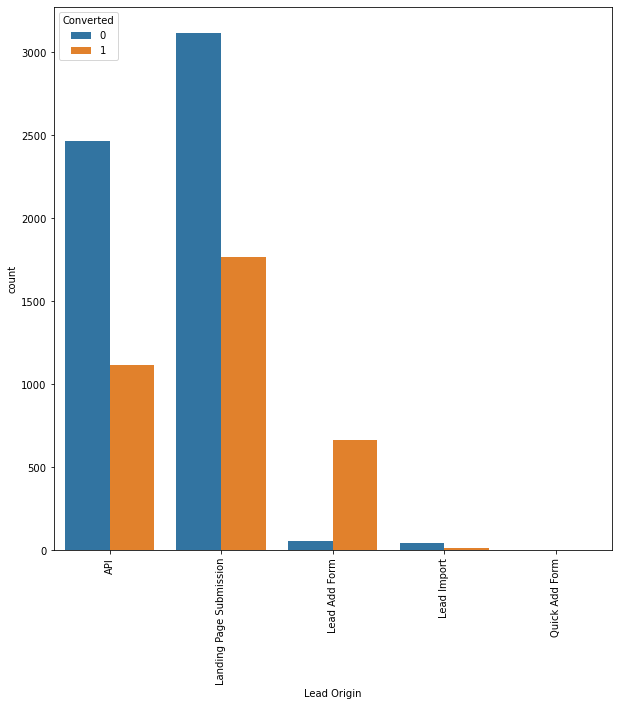

In [27]:
#Lines 27-32 and line 64 I have checked the conversion barcharts for each one of their variables
plt.figure(figsize=(10,10))
sns.countplot(x="Lead Origin",hue="Converted",data=leadfile)
plt.xticks(rotation = 90)
plt.show()

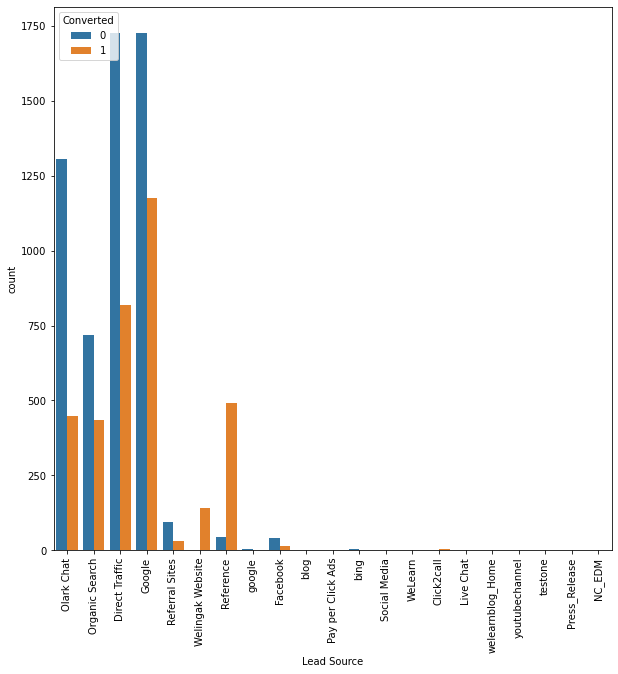

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(x="Lead Source",hue="Converted",data=leadfile)
plt.xticks(rotation = 90)
plt.show()

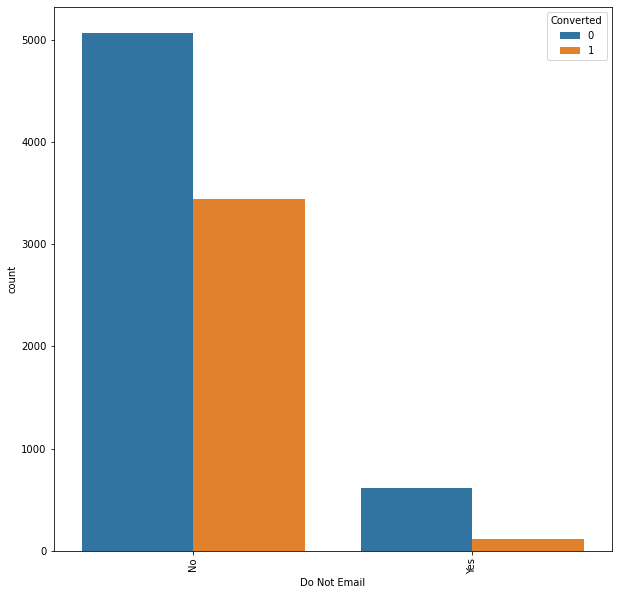

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(x="Do Not Email",hue="Converted",data=leadfile)
plt.xticks(rotation = 90)
plt.show()

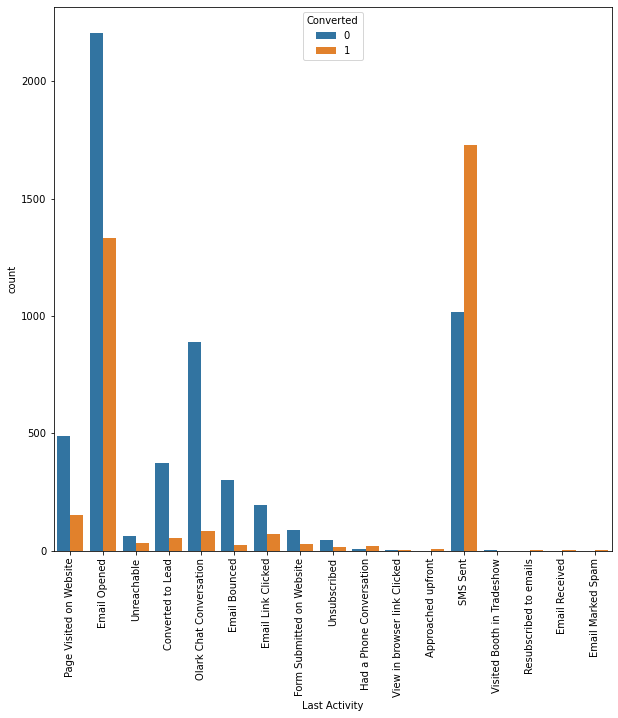

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(x="Last Activity",hue="Converted",data=leadfile)
plt.xticks(rotation = 90)
plt.show()

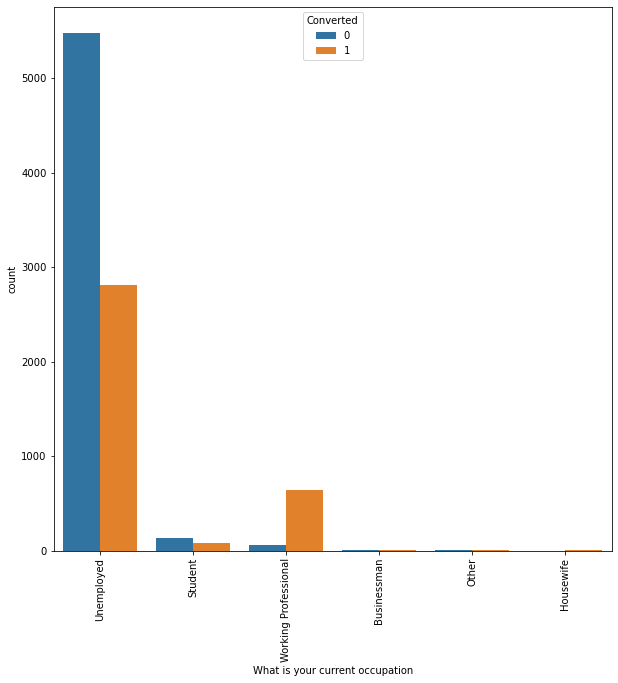

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(x="What is your current occupation",hue="Converted",data=leadfile)
plt.xticks(rotation = 90)
plt.show()

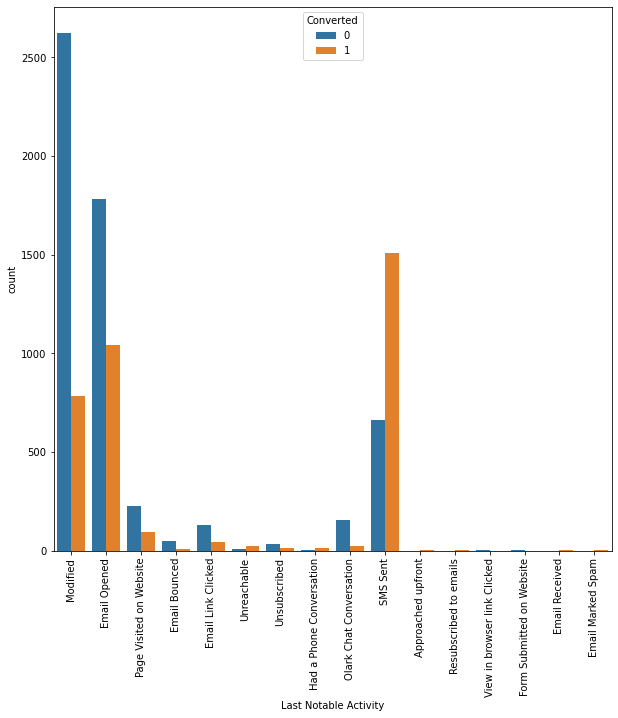

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(x="Last Notable Activity",hue="Converted",data=leadfile)
plt.xticks(rotation = 90)
plt.show()

In [33]:
#Line 33-63 I have created a droplist for values that are heavily concentrated towards only one variable hence of no use
leadfile['Lead Number'].value_counts(dropna=False)

660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64

In [34]:
droplist=['Lead Number']

In [35]:
droplist.append('Prospect ID')

In [36]:
leadfile['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [37]:
droplist.append('Do Not Call')

In [38]:
leadfile['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
0.0       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [39]:
leadfile['Country'].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [40]:
droplist.append('Country')

In [41]:
leadfile['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [42]:
droplist.append('What matters most to you in choosing a course')

In [43]:
leadfile['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [44]:
droplist.append('Search')

In [45]:
leadfile['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [46]:
droplist.append('Magazine')

In [47]:
leadfile['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [48]:
droplist.append('Newspaper Article')

In [49]:
leadfile['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [50]:
droplist.append('X Education Forums')

In [51]:
leadfile['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [52]:
droplist.append('Newspaper')

In [53]:
leadfile['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [54]:
droplist.append('Digital Advertisement')

In [55]:
leadfile['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [56]:
droplist.append('Through Recommendations')

In [57]:
leadfile['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [58]:
droplist.append('Receive More Updates About Our Courses')

In [59]:
leadfile['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [60]:
droplist.append('Get updates on DM Content')

In [61]:
leadfile['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [62]:
droplist.append('I agree to pay the amount through cheque')

In [63]:
leadfile['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

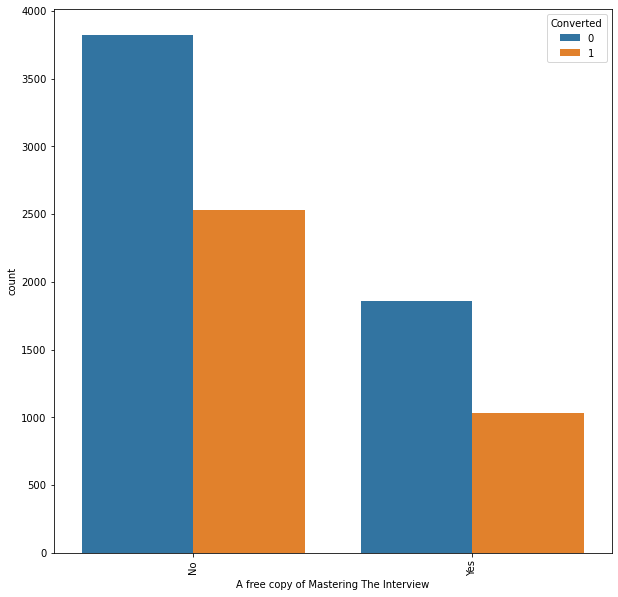

In [64]:
plt.figure(figsize=(10,10))
sns.countplot(x="A free copy of Mastering The Interview",hue="Converted",data=leadfile)
plt.xticks(rotation = 90)
plt.show()

In [65]:
#Checking the droplist
droplist

['Lead Number',
 'Prospect ID',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [66]:
#Checking the droplist
droplist

['Lead Number',
 'Prospect ID',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [67]:
#dropping the values
leadfile=leadfile.drop(droplist, axis=1)

In [68]:
#checking the mainfile again
leadfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Origin                             9240 non-null   object
 1   Lead Source                             9240 non-null   object
 2   Do Not Email                            9240 non-null   object
 3   Converted                               9240 non-null   int64 
 4   TotalVisits                             9240 non-null   object
 5   Total Time Spent on Website             9240 non-null   int64 
 6   Page Views Per Visit                    9240 non-null   object
 7   Last Activity                           9240 non-null   object
 8   What is your current occupation         9240 non-null   object
 9   Update me on Supply Chain Content       9240 non-null   object
 10  A free copy of Mastering The Interview  9240 non-null   object
 11  Last

In [69]:
#Checking the one int64 column other than converted to check for any outliers
leadfile['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

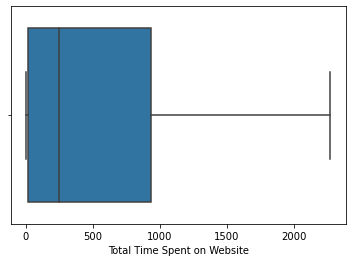

In [70]:
#No outliers in particular detected
sns.boxplot(leadfile['Total Time Spent on Website'])
plt.show()

In [71]:
#Checking the conversion rate
cvtd=(sum(leadfile['Converted'])/len(leadfile['Converted'].index))*100

In [72]:
#Rate is ~38.5%
cvtd

38.53896103896104

In [73]:
#Converting yes/no into 1/0 binary
liszt=['Do Not Email','A free copy of Mastering The Interview']
def binmap(k):
    return k.map({'Yes': 1, "No": 0})
leadfile[liszt]=leadfile[liszt].apply(binmap)

In [74]:
#checking object columns
originalcolumns= leadfile.select_dtypes(include=['object']).columns
originalcolumns

Index(['Lead Origin', 'Lead Source', 'TotalVisits', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'Update me on Supply Chain Content', 'Last Notable Activity'],
      dtype='object')

In [75]:
#Creating dummy variables for object columns
dummy=pd.get_dummies(leadfile[['Lead Origin', 'Lead Source', 'TotalVisits', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'Update me on Supply Chain Content', 'Last Notable Activity']], drop_first=True)
leadfile=pd.concat([leadfile,dummy],1)

In [76]:
leadfile.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Update me on Supply Chain Content,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,No,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,No,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0


In [77]:
#dropping originalcolumns as they are not needed anymore
leadfile=leadfile.drop(originalcolumns, axis=1)

In [78]:
leadfile.head()

,Do Not Email,Converted,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1532,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,305,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,1428,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [79]:
#doing the train test split
from sklearn.model_selection import train_test_split
X=leadfile.drop('Converted',axis=1)
y=leadfile['Converted']

In [80]:
X.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,674,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1532,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,305,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1428,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [81]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [82]:
#doing 70%train 30%test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size= 0.70,random_state= 100)

In [83]:
X_train.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,487,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,106,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,1230,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [84]:
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

In [85]:
#doing the scaling of data
from sklearn.preprocessing import StandardScaler
stdscl=StandardScaler()
numbers=X_train.select_dtypes(include=['int64']).columns
X_train[numbers]=stdscl.fit_transform(X_train[numbers])

In [86]:
X_train.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-0.291638,-0.885371,-0.673169,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,-0.291638,0.005716,1.485511,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,-0.291638,-0.691418,-0.673169,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,-0.291638,1.365219,-0.673169,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,-0.291638,-0.885371,-0.673169,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [91]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [93]:
#Selecting features using RFE(line 93-96) 
rfe=RFE(logreg,step=15)
rfe=rfe.fit(X_train, y_train)

In [94]:
rfe.support_

array([ True,  True, False, False,  True, False,  True,  True,  True,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True,  True, False, False, False,
        True, False, False,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False,  True,  True,  True,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,

In [95]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Live Chat', False, 5),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 6),
 ('Lead Source_Press_Release', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', True, 1),
 ('Lead Source_blog', False, 2),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 9),
 ('Lead Sour

In [96]:
colmns=X_train.columns[rfe.support_]
colmns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       ...
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object', length=109)

In [97]:
#creating the first regression model
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train[colmns])
logm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6362
Model Family:                Binomial   Df Model:                          105
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 23 Jan 2023   Deviance:                   1.4598e+05
Time:                        14:16:39   Pearson chi2:                 7.14e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.513e+15   3.04e+07   4.97e+07      0.000    1.51e+15    1.51e+15
Do Not Email                                         -1.705e+14   1.18e+06  -1.44e+08      0.000    -1.7e+14    -1.7e+14
Total Time Spent on Website                           1.683e+14   9.81e+05   1.72e+08      0.000    1.68e+14    1.68e+14
Lead Origin_Lead Add Form                            -1.874e+14    1.2e+07  -1.56e+07      0.000   -1.87e+14   -1.87e+14
Lead Origin_Quick Add Form                            1.822e+17   6.78e+07   2.69e+09      0.000    1.82e+17    1.82e+17
Lead Source_Direct Traffic                           -1.257e+14   2.24e+06  -5.61e+07      0.000   -1.26e+14   -1.26e+14
Lead Source_Facebook                                 -2.779e+15   1.24e+07  -2.24e+08      0.000   -2.78e+15   -2.78e+15
Lead Source_NC_EDM                                     1.76e+16   6.73e+07   2.62e+08      0.000    1.76e+16    1.76e+16
Lead Source_Organic Search                             1.14e+12    2.9e+06   3.93e+05      0.000    1.14e+12    1.14e+12
Lead Source_Reference                                -3.181e+13   1.23e+07  -2.59e+06      0.000   -3.18e+13   -3.18e+13
Lead Source_Referral Sites                           -6.034e+13   7.22e+06  -8.35e+06      0.000   -6.03e+13   -6.03e+13
Lead Source_Social Media                              6.834e+14   4.76e+07   1.44e+07      0.000    6.83e+14    6.83e+14
Lead Source_WeLearn                                   2.424e+16   6.72e+07   3.61e+08      0.000    2.42e+16    2.42e+16
Lead Source_Welingak Website                           5.69e+14   1.37e+07   4.15e+07      0.000    5.69e+14    5.69e+14
Lead Source_bing                                      9.451e+13   3.88e+07   2.43e+06      0.000    9.45e+13    9.45e+13
Lead Source_google                                   -1.553e+17   3.03e+07  -5.12e+09      0.000   -1.55e+17   -1.55e+17
TotalVisits_1.0                                      -1.321e+15   8.22e+06  -1.61e+08      0.000   -1.32e+15   -1.32e+15
TotalVisits_2.0                                      -9.935e+14   3.33e+06  -2.98e+08      0.000   -9.94e+14   -9.94e+14
TotalVisits_3.0                                      -8.484e+14   3.37e+06  -2.52e+08      0.000   -8.48e+14   -8.48e+14
TotalVisits_4.0                                      -6.898e+14   5.05e+06  -1.37e+08      0.000    -6.9e+14    -6.9e+14
TotalVisits_5.0                                      -7.597e+14   1.49e+07  -5.09e+07      0.000    -7.6e+14    -7.6e+14
TotalVisits_6.0                                      -7.725e+14   5.72e+06  -1.35e+08      0.000   -7.72e+14   -7.72e+14
TotalVisits_7.0                                      -9.01

In [100]:
#checking VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train[colmns].columns
vif['VIF']=[variance_inflation_factor(X_train[colmns].values, k) for k in range(X_train[colmns].shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
50,Page Views Per Visit_1.93,inf
36,TotalVisits_0.0,inf
55,Page Views Per Visit_2.45,inf
90,Last Activity_Resubscribed to emails,inf
106,Last Notable Activity_Resubscribed to emails,inf
...,...,...
13,Lead Source_bing,1.004329
53,Page Views Per Visit_2.38,1.002604
11,Lead Source_WeLearn,1.001913
64,Page Views Per Visit_3.6,1.001890


In [103]:
#lines 103-115 dropping columns with very high vif values
colmns=colmns.drop('Page Views Per Visit_1.93','TotalVisits_0.0')

In [104]:
colmns=colmns.drop('Last Activity_Resubscribed to emails','Last Notable Activity_Resubscribed to emails') 

In [105]:
colmns=colmns.drop('Page Views Per Visit_2.45')

In [106]:
colmns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       ...
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object', length=106)

In [112]:
newdroplist=['TotalVisits_0.0','Last Notable Activity_Resubscribed to emails']
newdroplist

['TotalVisits_0.0', 'Last Notable Activity_Resubscribed to emails']

In [113]:
colmns=colmns.drop(newdroplist)

In [115]:
colmns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       ...
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object', length=104)

In [116]:
#Creating a second regression model
X_train_sm=sm.add_constant(X_train[colmns])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6364
Model Family:                Binomial   Df Model:                          103
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 23 Jan 2023   Deviance:                   1.7748e+05
Time:                        14:54:34   Pearson chi2:                 8.68e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 8.584e+14   3.04e+07   2.83e+07      0.000    8.58e+14    8.58e+14
Do Not Email                                         -1.037e+14   1.18e+06  -8.78e+07      0.000   -1.04e+14   -1.04e+14
Total Time Spent on Website                           8.002e+14   9.81e+05   8.16e+08      0.000       8e+14       8e+14
Lead Origin_Lead Add Form                             1.612e+15    1.2e+07   1.34e+08      0.000    1.61e+15    1.61e+15
Lead Origin_Quick Add Form                            1.419e+16   6.78e+07   2.09e+08      0.000    1.42e+16    1.42e+16
Lead Source_Direct Traffic                           -1.807e+14   2.24e+06  -8.07e+07      0.000   -1.81e+14   -1.81e+14
Lead Source_Facebook                                  -3.84e+14   1.24e+07   -3.1e+07      0.000   -3.84e+14   -3.84e+14
Lead Source_NC_EDM                                    6.711e+15   6.73e+07   9.97e+07      0.000    6.71e+15    6.71e+15
Lead Source_Organic Search                           -1.099e+14    2.9e+06  -3.79e+07      0.000    -1.1e+14    -1.1e+14
Lead Source_Reference                                -7.176e+14   1.23e+07  -5.85e+07      0.000   -7.18e+14   -7.18e+14
Lead Source_Referral Sites                           -1.952e+14   7.22e+06   -2.7e+07      0.000   -1.95e+14   -1.95e+14
Lead Source_Social Media                             -6.377e+14   4.76e+07  -1.34e+07      0.000   -6.38e+14   -6.38e+14
Lead Source_WeLearn                                    2.96e+15   6.72e+07   4.41e+07      0.000    2.96e+15    2.96e+15
Lead Source_Welingak Website                         -4.666e+14   1.37e+07  -3.41e+07      0.000   -4.67e+14   -4.67e+14
Lead Source_bing                                     -5.186e+13   3.88e+07  -1.34e+06      0.000   -5.19e+13   -5.19e+13
Lead Source_google                                   -9.383e+15   3.03e+07  -3.09e+08      0.000   -9.38e+15   -9.38e+15
TotalVisits_1.0                                      -7.501e+14   8.22e+06  -9.12e+07      0.000    -7.5e+14    -7.5e+14
TotalVisits_2.0                                      -1.307e+15   3.33e+06  -3.92e+08      0.000   -1.31e+15   -1.31e+15
TotalVisits_3.0                                      -1.052e+15   3.37e+06  -3.12e+08      0.000   -1.05e+15   -1.05e+15
TotalVisits_4.0                                      -8.177e+14   5.05e+06  -1.62e+08      0.000   -8.18e+14   -8.18e+14
TotalVisits_5.0                                      -1.417e+15   1.49e+07   -9.5e+07      0.000   -1.42e+15   -1.42e+15
TotalVisits_6.0                                      -8.154e+14   5.72e+06  -1.42e+08      0.000   -8.15e+14   -8.15e+14
TotalVisits_7.0                                      -8.77

In [117]:
#Checking vif for the 2nd time
vif=pd.DataFrame()
vif['Features']=X_train[colmns].columns
vif['VIF']=[variance_inflation_factor(X_train[colmns].values, k) for k in range(X_train[colmns].shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
35,TotalVisits_251.0,inf
43,Page Views Per Visit_1.48,inf
93,What is your current occupation_Unemployed,160.041552
99,Last Notable Activity_Modified,69.675522
97,Last Notable Activity_Email Opened,55.048017
...,...,...
13,Lead Source_bing,1.004328
51,Page Views Per Visit_2.38,1.002603
11,Lead Source_WeLearn,1.001912
61,Page Views Per Visit_3.6,1.001889


In [118]:
#Dropping more columns with very high VIF
neodroplist=['TotalVisits_251.0','Page Views Per Visit_1.48','What is your current occupation_Unemployed',
'Last Notable Activity_Modified',
'Last Notable Activity_Email Opened']
neodroplist

['TotalVisits_251.0',
 'Page Views Per Visit_1.48',
 'What is your current occupation_Unemployed',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Email Opened']

In [119]:
colmns=colmns.drop(neodroplist)
colmns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_google', 'TotalVisits_1.0', 'TotalVisits_2.0',
       'TotalVisits_3.0', 'TotalVisits_4.0', 'TotalVisits_5.0',
       'TotalVisits_6.0', 'TotalVisits_7.0', 'TotalVisits_8.0',
       'TotalVisits_9.0', 'TotalVisits_10.0', 'TotalVisits_14.0',
       'TotalVisits_15.0', 'TotalVisits_17.0', 'TotalVisits_20.0',
       'TotalVisits_21.0', 'TotalVisits_22.0', 'TotalVisits_24.0',
       'TotalVisits_25.0', 'TotalVisits_27.0', 'TotalVisits_74.0',
       'Page Views Per Visit_1.0', 'Page Views Per Visit_1.2',
       'Page Views Per Visit_1.23', 'Page Views Per Visi

In [120]:
#Creating a third regression model
X_train_sm=sm.add_constant(X_train[colmns])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6368
Model Family:                Binomial   Df Model:                           99
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.9
Date:                Mon, 23 Jan 2023   Deviance:                       5123.7
Time:                        15:00:38   Pearson chi2:                 7.02e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4156
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1198      0.095     -1.257      0.209      -0.306       0.067
Do Not Email                                            -0.2673      0.054     -4.921      0.000      -0.374      -0.161
Total Time Spent on Website                              1.1603      0.042     27.836      0.000       1.079       1.242
Lead Origin_Lead Add Form                                2.4690      0.538      4.586      0.000       1.414       3.524
Lead Origin_Quick Add Form                              24.9655   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                              -0.3030      0.092     -3.296      0.001      -0.483      -0.123
Lead Source_Facebook                                    -0.6865      0.527     -1.302      0.193      -1.720       0.347
Lead Source_NC_EDM                                      24.6915   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Organic Search                              -0.2414      0.119     -2.034      0.042      -0.474      -0.009
Lead Source_Reference                                    0.2884      0.558      0.517      0.605      -0.804       1.381
Lead Source_Referral Sites                              -0.1879      0.316     -0.595      0.552      -0.806       0.431
Lead Source_Social Media                                 2.6046      1.446      1.802      0.072      -0.229       5.438
Lead Source_WeLearn                                     24.6499   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Welingak Website                             2.0929      0.890      2.350      0.019       0.348       3.838
Lead Source_bing                                         0.8814      1.472      0.599      0.549      -2.003       3.766
Lead Source_google                                     -22.7567   5.45e+04     -0.000      1.000   -1.07e+05    1.07e+05
TotalVisits_1.0                                         -2.5311      0.397     -6.378      0.000      -3.309      -1.753
TotalVisits_2.0                                         -1.5283      0.140    -10.930      0.000      -1.802      -1.254
TotalVisits_3.0                                         -1.3091      0.139     -9.443      0.000      -1.581      -1.037
TotalVisits_4.0                                         -0.9303      0.201     -4.619      0.000      -1.325      -0.536
TotalVisits_5.0                                         -0.4016      0.621     -0.646      0.518      -1.620       0.816
TotalVisits_6.0                                         -0.5121      0.216     -2.373      0.018      -0.935      -0.089
TotalVisits_7.0                                         -1

In [121]:
#lines 121-122 I have created another drop list where I added columns with very high p-values(more than 0.05) which included all the page views 
#and total visit columns
anotherdroplist=['Lead Origin_Quick Add Form','Lead Source_NC_EDM','Lead Source_WeLearn','Lead Source_google','Page Views Per Visit_1.2','Page Views Per Visit_1.23', 'Page Views Per Visit_1.25',
       'Page Views Per Visit_1.31', 'Page Views Per Visit_1.4',
       'Page Views Per Visit_1.43', 'Page Views Per Visit_1.57',
       'Page Views Per Visit_1.6', 'Page Views Per Visit_1.63',
       'Page Views Per Visit_1.67', 'Page Views Per Visit_1.71',
       'Page Views Per Visit_2.17', 'Page Views Per Visit_2.29',
       'Page Views Per Visit_2.38', 'Page Views Per Visit_2.4',
       'Page Views Per Visit_2.5', 'Page Views Per Visit_2.67',
       'Page Views Per Visit_2.75', 'Page Views Per Visit_3.2',
       'Page Views Per Visit_3.25', 'Page Views Per Visit_3.33',
       'Page Views Per Visit_3.38', 'Page Views Per Visit_3.4',
       'Page Views Per Visit_3.6', 'Page Views Per Visit_3.67',
       'Page Views Per Visit_4.0', 'Page Views Per Visit_4.25',
       'Page Views Per Visit_4.33', 'Page Views Per Visit_4.4',
       'Page Views Per Visit_4.75', 'Page Views Per Visit_5.0',
       'Page Views Per Visit_5.4', 'Page Views Per Visit_5.67',
       'Page Views Per Visit_6.0', 'Page Views Per Visit_6.67',
       'Page Views Per Visit_8.0', 'Page Views Per Visit_9.0',
       'Page Views Per Visit_11.0', 'Page Views Per Visit_12.0',
       'Page Views Per Visit_14.0', 'Page Views Per Visit_15.0',
       'Page Views Per Visit_0.00','TotalVisits_1.0', 'TotalVisits_2.0',
       'TotalVisits_3.0', 'TotalVisits_4.0', 'TotalVisits_5.0',
       'TotalVisits_6.0', 'TotalVisits_7.0', 'TotalVisits_8.0',
       'TotalVisits_9.0', 'TotalVisits_10.0', 'TotalVisits_14.0',
       'TotalVisits_15.0', 'TotalVisits_17.0', 'TotalVisits_20.0',
       'TotalVisits_21.0', 'TotalVisits_22.0', 'TotalVisits_24.0',
       'TotalVisits_25.0', 'TotalVisits_27.0', 'TotalVisits_74.0']

In [122]:
colmns=colmns.drop(anotherdroplist)
colmns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Page Views Per Visit_1.0',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professiona

In [123]:
#Creating a 4th regression model
X_train_sm=sm.add_constant(X_train[colmns])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.9
Date:                Mon, 23 Jan 2023   Deviance:                       5399.7
Time:                        15:12:51   Pearson chi2:                 7.27e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3901
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9022      0.063    -14.393      0.000      -1.025      -0.779
Do Not Email                                            -0.2707      0.052     -5.243      0.000      -0.372      -0.169
Total Time Spent on Website                              0.9594      0.036     26.956      0.000       0.890       1.029
Lead Origin_Lead Add Form                                2.7268      0.496      5.497      0.000       1.755       3.699
Lead Source_Direct Traffic                              -0.6276      0.083     -7.601      0.000      -0.789      -0.466
Lead Source_Facebook                                    -0.7050      0.509     -1.384      0.166      -1.703       0.293
Lead Source_Organic Search                              -0.4055      0.107     -3.782      0.000      -0.616      -0.195
Lead Source_Reference                                    0.3937      0.528      0.745      0.456      -0.641       1.429
Lead Source_Referral Sites                              -0.4642      0.302     -1.538      0.124      -1.056       0.127
Lead Source_Social Media                                 1.8518      1.471      1.259      0.208      -1.031       4.734
Lead Source_Welingak Website                             2.2739      0.872      2.607      0.009       0.564       3.984
Lead Source_bing                                         0.3201      1.439      0.222      0.824      -2.500       3.140
Page Views Per Visit_1.0                                 0.2003      0.165      1.214      0.225      -0.123       0.524
Last Activity_Converted to Lead                         -1.5176      0.230     -6.601      0.000      -1.968      -1.067
Last Activity_Email Bounced                             -1.6498      0.415     -3.971      0.000      -2.464      -0.836
Last Activity_Email Link Clicked                        -0.7483      0.383     -1.952      0.051      -1.500       0.003
Last Activity_Form Submitted on Website                 -0.7857      0.328     -2.394      0.017      -1.429      -0.142
Last Activity_Had a Phone Conversation                   0.3743      0.924      0.405      0.685      -1.437       2.185
Last Activity_Olark Chat Conversation                   -1.3034      0.185     -7.061      0.000      -1.665      -0.942
Last Activity_Page Visited on Website                   -0.9962      0.214     -4.659      0.000      -1.415      -0.577
Last Activity_SMS Sent                                   0.0370      0.136      0.271      0.786      -0.230       0.304
Last Activity_Unreachable                               -1.6160      0.646     -2.503      0.012      -2.881      -0.351
Last Activity_View in browser link Clicked              -0

In [124]:
#creating a 4th droplist for high p-value columns(more than 0.05)
droplistfour=['Lead Source_Facebook','Lead Source_Reference','Lead Source_Referral Sites','Lead Source_Social Media','Lead Source_bing',
              'Page Views Per Visit_1.0','Last Activity_Email Link Clicked','Last Activity_Had a Phone Conversation','Last Activity_SMS Sent'
              ,'Last Activity_View in browser link Clicked','What is your current occupation_Housewife','What is your current occupation_Other'
              ,'What is your current occupation_Student','Last Notable Activity_Email Link Clicked','Last Notable Activity_Olark Chat Conversation']

In [125]:
colmns=colmns.drop(droplistfour)
colmns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Organic Search', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [126]:
#creating a 5th regression model
X_train_sm=sm.add_constant(X_train[colmns])
logm5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.8
Date:                Mon, 23 Jan 2023   Deviance:                       5433.5
Time:                        15:20:01   Pearson chi2:                 7.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3869
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9218      0.057    -16.273      0.000      -1.033      -0.811
Do Not Email                                            -0.2732      0.052     -5.303      0.000      -0.374      -0.172
Total Time Spent on Website                              0.9655      0.035     27.284      0.000       0.896       1.035
Lead Origin_Lead Add Form                                3.1241      0.188     16.639      0.000       2.756       3.492
Lead Source_Direct Traffic                              -0.6064      0.081     -7.442      0.000      -0.766      -0.447
Lead Source_Organic Search                              -0.3865      0.106     -3.642      0.000      -0.595      -0.179
Lead Source_Welingak Website                             1.8713      0.742      2.522      0.012       0.417       3.325
Last Activity_Converted to Lead                         -1.4141      0.214     -6.608      0.000      -1.834      -0.995
Last Activity_Email Bounced                             -1.6056      0.416     -3.856      0.000      -2.422      -0.789
Last Activity_Form Submitted on Website                 -0.6841      0.318     -2.151      0.031      -1.307      -0.061
Last Activity_Olark Chat Conversation                   -1.1826      0.160     -7.374      0.000      -1.497      -0.868
Last Activity_Page Visited on Website                   -0.9561      0.211     -4.530      0.000      -1.370      -0.542
Last Activity_Unreachable                               -1.5904      0.645     -2.465      0.014      -2.855      -0.326
What is your current occupation_Working Professional     2.7798      0.188     14.782      0.000       2.411       3.148
Last Notable Activity_Email Bounced                      1.6940      0.594      2.853      0.004       0.530       2.858
Last Notable Activity_Had a Phone Conversation           3.2081      1.103      2.907      0.004       1.045       5.371
Last Notable Activity_Page Visited on Website            0.7202      0.271      2.657      0.008       0.189       1.251
Last Notable Activity_SMS Sent                           1.3741      0.080     17.105      0.000       1.217       1.532
Last Notable Activity_Unreachable                        3.1473      0.823      3.825      0.000       1.535       4.760
========================================================================================================================
"""

In [127]:
#checking the vif of columns which seems to be fine this time
vif=pd.DataFrame()
vif['Features']=X_train[colmns].columns
vif['VIF']=[variance_inflation_factor(X_train[colmns].values, k) for k in range(X_train[colmns].shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
10,Last Activity_Page Visited on Website,2.083203
15,Last Notable Activity_Page Visited on Website,1.993800
7,Last Activity_Email Bounced,1.895532
0,Do Not Email,1.680151
11,Last Activity_Unreachable,1.589926
17,Last Notable Activity_Unreachable,1.584348
2,Lead Origin_Lead Add Form,1.402416
16,Last Notable Activity_SMS Sent,1.260304
3,Lead Source_Direct Traffic,1.255404
5,Lead Source_Welingak Website,1.237392


In [128]:
#Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.154865
6795    0.191073
3516    0.180985
8105    0.864128
3934    0.154865
4844    0.989055
3297    0.126385
8071    0.991912
987     0.158247
7423    0.919700
dtype: float64

In [129]:
#making a dataframe with the converted and predicted values
y_train_final_pred = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_final_pred['Prospect ID'] = y_train.index
y_train_final_pred.head()

,Converted,Converted_prob,Prospect ID
1871,0,0.154865,1871
6795,0,0.191073,6795
3516,0,0.180985,3516
8105,0,0.864128,8105
3934,0,0.154865,3934


In [130]:
#making predicted label based on 0.5 cutoff point for converted prob
y_train_final_pred['predicted']=y_train_final_pred.Converted_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_final_pred.head()

,Converted,Converted_prob,Prospect ID,predicted
1871,0,0.154865,1871,0
6795,0,0.191073,6795,0
3516,0,0.180985,3516,0
8105,0,0.864128,8105,1
3934,0,0.154865,3934,0


In [131]:
#creating a confusion matrix
from sklearn import metrics
conf=metrics.confusion_matrix(y_train_final_pred.Converted, y_train_final_pred.predicted)
print(conf)

[[3556  446]
 [ 810 1656]]


In [132]:
# Actual/Predicted     Not_Converted    Converted
    # Not_Converted        3556            446
    # Converted            810             1656 

In [134]:
#accuracy score
print(metrics.accuracy_score(y_train_final_pred.Converted, y_train_final_pred.predicted))

0.8058132343846629


In [135]:
TP=conf[1,1] #True Positive 
TN=conf[0,0] #True Negatives
FP=conf[0,1] #False Positives
FN=conf[1,0] #False Negatives

In [136]:
TP/float(TP+FN) #Sensitivity

0.6715328467153284

In [137]:
TN/float(TN+FP) #Specificity

0.8885557221389305

In [138]:
print(FP/float(TN+FP)) #False Positive rate

0.11144427786106946


In [139]:
print(TP/float(TP+FP)) #Positive predictive value

0.7878211227402474


In [140]:
print(TN/float(TN+FN)) #Negative Predicitive Value

0.8144754924415941


In [141]:
#lines 141-145: drawing an roc curve whole area comes out to be 0.88
def draw_roccurvve( actual, probs ):
    fpr, tpr, thresholds=metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score=metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate/[1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [143]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_final_pred.Converted, y_train_final_pred.Converted_prob,drop_intermediate = False)

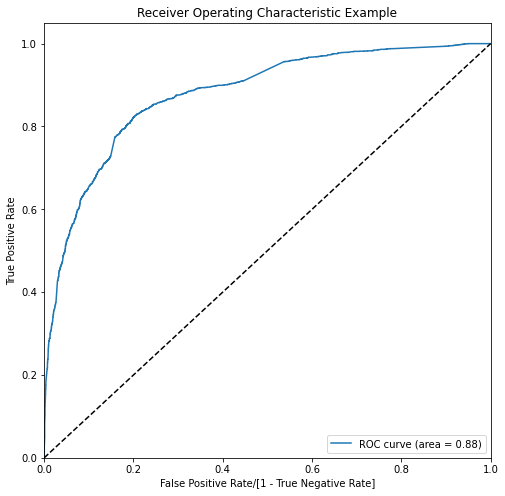

In [145]:
draw_roccurvve(y_train_final_pred.Converted,y_train_final_pred.Converted_prob)

In [147]:
#finding the optimal cutoff point
values = [float(i)/10 for i in range(10)]
for j in values:
    y_train_final_pred[j]= y_train_final_pred.Converted_prob.map(lambda i: 1 if i > j else 0)
y_train_final_pred.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.154865,1871,0,1,1,0,0,0,0,0,0,0,0
6795,0,0.191073,6795,0,1,1,0,0,0,0,0,0,0,0
3516,0,0.180985,3516,0,1,1,0,0,0,0,0,0,0,0
8105,0,0.864128,8105,1,1,1,1,1,1,1,1,1,1,0
3934,0,0.154865,3934,0,1,1,0,0,0,0,0,0,0,0


In [151]:
cutoffs = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # True Positive 
# TN = confusion[0,0] # True Negatives
# FP = confusion[0,1] # False Positives
# FN = confusion[1,0] # False Negatives
val = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for x in val:
    conmat=metrics.confusion_matrix(y_train_final_pred.Converted, y_train_final_pred[x] )
    total=sum(sum(conmat))
    Accuracy = (conmat[0,0]+conmat[1,1])/total  
    Specificity=conmat[0,0]/(conmat[0,0]+conmat[0,1])
    Sensitivity=conmat[1,1]/(conmat[1,0]+conmat[1,1])
    cutoffs.loc[x] =[ x ,Accuracy,Sensitivity,Specificity]
print(cutoffs)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.576531     0.978913     0.328586
0.2          0.2  0.750928     0.886861     0.667166
0.3          0.3  0.799938     0.839011     0.775862
0.4          0.4  0.813080     0.785888     0.829835
0.5          0.5  0.805813     0.671533     0.888556
0.6          0.6  0.799474     0.592052     0.927286
0.7          0.7  0.786487     0.520681     0.950275
0.8          0.8  0.761905     0.423358     0.970515
0.9          0.9  0.717687     0.276156     0.989755


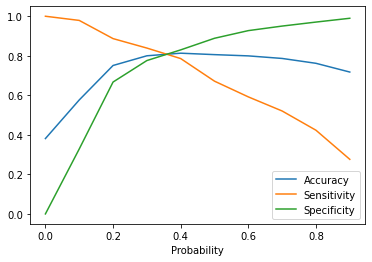

In [152]:
cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [153]:
#cutoff point in the above image is between 0.2 and 0.4 but close to 0.4 so I have selected 0.35 
y_train_final_pred['Final_Prediction']=y_train_final_pred.Converted_prob.map( lambda a: 1 if a > 0.35 else 0)
y_train_final_pred.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Prediction
1871,0,0.154865,1871,0,1,1,0,0,0,0,0,0,0,0,0
6795,0,0.191073,6795,0,1,1,0,0,0,0,0,0,0,0,0
3516,0,0.180985,3516,0,1,1,0,0,0,0,0,0,0,0,0
8105,0,0.864128,8105,1,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.154865,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [154]:
#accuracy score
print(metrics.accuracy_score(y_true= y_train_final_pred.Converted, y_pred= y_train_final_pred.Final_Prediction))

0.8081323438466296


In [156]:
#new confusion matrix
confusionnew=metrics.confusion_matrix(y_train_final_pred.Converted, y_train_final_pred.Final_Prediction )
confusionnew

array([[3218,  784],
       [ 457, 2009]], dtype=int64)

In [157]:
TP = confusionnew[1,1] #True Positive 
TN = confusionnew[0,0] #True Negatives
FP = confusionnew[0,1] #False Positives
FN = confusionnew[1,0] #False Negatives

In [158]:
TP/float(TP+FN) #Sensitivity

0.8146796431467964

In [159]:
TN/float(TN+FP) #Specificity

0.8040979510244878

In [160]:
print(FP/float(TN+FP)) #False Positive rate

0.19590204897551225


In [161]:
print(TP/float(TP+FP)) #Positive predictive value

0.7192982456140351


In [162]:
print(TN/float(TN+FN)) #Negative Predicitive Value

0.8756462585034014


In [163]:
#confusion matrix for precision and recall score
confusionneo=metrics.confusion_matrix(y_train_final_pred.Converted, y_train_final_pred.Final_Prediction)
confusionneo

array([[3218,  784],
       [ 457, 2009]], dtype=int64)

In [164]:
#Precision
confusionneo[1,1]/(confusionneo[0,1]+confusionneo[1,1])

0.7192982456140351

In [165]:
#Recall
confusionneo[1,1]/(confusionneo[1,0]+confusionneo[1,1])

0.8146796431467964

In [167]:
#precision and recall score using sklearn
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_final_pred.Converted , y_train_final_pred.Final_Prediction)

0.7192982456140351

In [168]:
recall_score(y_train_final_pred.Converted , y_train_final_pred.Final_Prediction)

0.8146796431467964

In [169]:
#line 169-171: Precision and recall curve
from sklearn.metrics import precision_recall_curve
y_train_final_pred.Converted, y_train_final_pred.Final_Prediction

(1871    0
 6795    0
 3516    0
 8105    0
 3934    0
        ..
 350     1
 79      1
 8039    1
 6936    0
 5640    0
 Name: Converted, Length: 6468, dtype: int64,
 1871    0
 6795    0
 3516    0
 8105    1
 3934    0
        ..
 350     1
 79      1
 8039    0
 6936    0
 5640    0
 Name: Final_Prediction, Length: 6468, dtype: int64)

In [170]:
prec, recall, threshold = precision_recall_curve(y_train_final_pred.Converted, y_train_final_pred.Converted_prob)

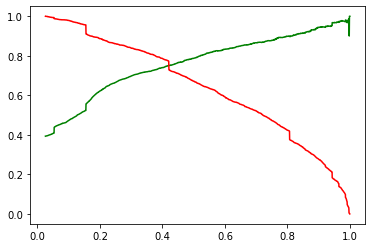

In [171]:
#plotting the graph between precision and recall tradeoffs which intersect at around 0.4
plt.plot(threshold, prec[:-1], "g-")
plt.plot(threshold, recall[:-1], "r-")
plt.show()

In [173]:
#Working on the test set now(doing scaling first)
numbercolumns=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[numbercolumns]=stdscl.fit_transform(X_test[numbercolumns])
X_test.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,-0.298654,0.933036,-0.67689,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2376,-0.298654,-0.900812,-0.67689,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,-0.298654,-0.793792,-0.67689,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9199,-0.298654,-0.900812,-0.67689,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,-0.298654,-0.900812,-0.67689,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
X_test=X_test[colmns]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Unreachable,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4269,-0.298654,0.933036,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2376,-0.298654,-0.900812,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7766,-0.298654,-0.793792,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
9199,-0.298654,-0.900812,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4359,-0.298654,-0.900812,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [175]:
#doing predictions on the test set
X_test_sm=sm.add_constant(X_test)
y_test_pred=res.predict(X_test_sm)
y_test_pred[:10]

4269    0.695981
2376    0.942035
7766    0.938781
9199    0.052524
4359    0.804416
9186    0.676102
1631    0.516017
8963    0.224332
8007    0.074355
5324    0.486090
dtype: float64

In [176]:
#converting y prediction to a dataframe
y_prednew=pd.DataFrame(y_test_pred)
y_prednew.head()

,0
4269,0.695981
2376,0.942035
7766,0.938781
9199,0.052524
4359,0.804416


In [177]:
#making y_test into a dataframe and concatening with y_prednew after adding prospect_id and dropping index
y_testdf = pd.DataFrame(y_test)
y_testdf['Prospect ID'] = y_testdf.index
y_prednew.reset_index(drop=True, inplace=True)
y_testdf.reset_index(drop=True, inplace=True)
y_predfinal = pd.concat([y_testdf, y_prednew],axis=1)
y_predfinal.head()

,Converted,Prospect ID,0
0,1,4269,0.695981
1,1,2376,0.942035
2,1,7766,0.938781
3,0,9199,0.052524
4,1,4359,0.804416


In [178]:
#Renaming and rearring some columns while adding converted probability based on the cutoff obtained above
y_predfinal= y_predfinal.rename(columns={ 0 : 'Converted_Probability'})
y_predfinal = y_predfinal[['Prospect ID','Converted','Converted_Probability']]
y_predfinal['Lead_Score'] = y_predfinal.Converted_Probability.map( lambda x: round(x*100))
y_predfinal['Final_Prediction'] = y_predfinal.Converted_Probability.map(lambda x: 1 if x > 0.35 else 0)
y_predfinal.head()

,Prospect ID,Converted,Converted_Probability,Lead_Score,Final_Prediction
0,4269,1,0.695981,70,1
1,2376,1,0.942035,94,1
2,7766,1,0.938781,94,1
3,9199,0,0.052524,5,0
4,4359,1,0.804416,80,1


In [180]:
#Accuracy score
metrics.accuracy_score(y_predfinal.Converted,y_predfinal.Final_Prediction)

0.8131313131313131

In [181]:
#Confusion matrix 
confusionX=metrics.confusion_matrix(y_predfinal.Converted,y_predfinal.Final_Prediction)
confusionX

array([[1373,  304],
       [ 214,  881]], dtype=int64)

In [182]:
TP=confusionX[1,1] #True Positive 
TN=confusionX[0,0] #True Negatives
FP=confusionX[0,1] #False Positives
FN=confusionX[1,0] #False Negatives

In [183]:
#Sensitivity
TP/float(TP+FN)

0.8045662100456621

In [184]:
#Specificity
TN/float(TN+FP)

0.8187239117471675

In [185]:
#Precision Score
precision_score(y_predfinal.Converted,y_predfinal.Final_Prediction)

0.7434599156118143

In [187]:
#Recall Score
recall_score(y_predfinal.Converted,y_predfinal.Final_Prediction)

0.8045662100456621

In [188]:
#Finding out what type of leads are more and less likely to be converted
res.params.sort_values(ascending=False)

Last Notable Activity_Had a Phone Conversation          3.208052
Last Notable Activity_Unreachable                       3.147343
Lead Origin_Lead Add Form                               3.124055
What is your current occupation_Working Professional    2.779770
Lead Source_Welingak Website                            1.871276
Last Notable Activity_Email Bounced                     1.693999
Last Notable Activity_SMS Sent                          1.374076
Total Time Spent on Website                             0.965467
Last Notable Activity_Page Visited on Website           0.720156
Do Not Email                                           -0.273210
Lead Source_Organic Search                             -0.386521
Lead Source_Direct Traffic                             -0.606431
Last Activity_Form Submitted on Website                -0.684080
const                                                  -0.921823
Last Activity_Page Visited on Website                  -0.956100
Last Activity_Olark Chat 

In [191]:
#finding out average lead score for the converted
y_converted = y_predfinal[y_predfinal['Final_Prediction']==1]
y_converted.head()

,Prospect ID,Converted,Converted_Probability,Lead_Score,Final_Prediction
0,4269,1,0.695981,70,1
1,2376,1,0.942035,94,1
2,7766,1,0.938781,94,1
4,4359,1,0.804416,80,1
5,9186,1,0.676102,68,1


In [192]:
#Average lead score for the converted
avgconvertscore=round(sum(y_converted['Lead_Score'])/len(y_converted.index))
avgconvertscore

69

In [193]:
#finding out average lead score for the non converted
y_notconverted = y_predfinal[y_predfinal['Final_Prediction']==0]
y_notconverted.head()

,Prospect ID,Converted,Converted_Probability,Lead_Score,Final_Prediction
3,9199,0,0.052524,5,0
7,8963,1,0.224332,22,0
8,8007,0,0.074355,7,0
10,2558,0,0.262489,26,0
11,8973,0,0.107987,11,0


In [194]:
#Average lead score for the non-converted
avgnotconvertscore=round(sum(y_notconverted['Lead_Score'])/len(y_notconverted.index))
avgnotconvertscore

14